In [152]:
#Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [153]:
#Read in the merged datafram files
merge1 = pd.read_csv("data_source/merge_data/public_education_cpi.csv")
public_education_cpi = pd.DataFrame(merge1)
public_education_cpi.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,CPI
0,4,Government Expenditure,Afghanistan,2010,17.07,General,100.00
1,4,Government Expenditure,Afghanistan,2015,12.51,General,132.12
2,4,Government Expenditure,Afghanistan,2017,15.66,General,144.77
3,8,Government Expenditure,Albania,2005,11.36,General,86.67
4,8,Government Expenditure,Albania,2015,11.32,General,111.40


In [154]:
merge2 = pd.read_csv("data_source/merge_data/public_education_crime.csv")
public_education_crime = pd.DataFrame(merge2)
public_education_crime.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,"Rate per 100,000"
0,4,Government Expenditure,Afghanistan,2010,17.07,Homicide (%),3.4
1,8,Government Expenditure,Albania,2005,11.36,Homicide (%),5.0
2,8,Government Expenditure,Albania,2005,11.36,Assault (%),5.4
3,8,Government Expenditure,Albania,2005,11.36,Theft (%),97.0
4,8,Government Expenditure,Albania,2005,11.36,Robbery (%),6.5


In [155]:
merge3 = pd.read_csv("data_source/merge_data/public_education_gdp.csv")
public_education_gdp = pd.DataFrame(merge3)
public_education_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP
0,4,Government Expenditure,Afghanistan,2010,17.07,Per Capita,558.0
1,4,Government Expenditure,Afghanistan,2015,12.51,Per Capita,611.0
2,4,Government Expenditure,Afghanistan,2017,15.66,Per Capita,619.0
3,8,Government Expenditure,Albania,2005,11.36,Per Capita,2615.0
4,8,Government Expenditure,Albania,2015,11.32,Per Capita,3895.0


In [156]:
merge4 = pd.read_csv("data_source/merge_data/public_education_gdp_percent.csv")
public_education_gdp_percent = pd.DataFrame(merge4)
public_education_gdp_percent.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP


In [157]:
merge5 = pd.read_csv("data_source/merge_data/public_education_labor.csv")
public_education_labor = pd.DataFrame(merge5)
public_education_labor.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Unemployment Rate (%)
0,4,Government Expenditure,Afghanistan,2010,17.07,Total Unemployment,7.8
1,4,Government Expenditure,Afghanistan,2015,12.51,Total Unemployment,8.9
2,8,Government Expenditure,Albania,2005,11.36,Total Unemployment,17.5
3,8,Government Expenditure,Albania,2015,11.32,Total Unemployment,17.1
4,24,Government Expenditure,Angola,2005,7.99,Total Unemployment,21.4


In [158]:
merge6 = pd.read_csv("data_source/merge_data/public_education_rnd_gdp.csv")
public_education_rnd_gdp = pd.DataFrame(merge6)
public_education_rnd_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Expenditure on R&D (%)
0,32,Government Expenditure,Argentina,2005,15.81,Higher education (%),5.7
1,40,Government Expenditure,Austria,2015,10.69,Higher education (%),0.6
2,31,Government Expenditure,Azerbaijan,2005,13.22,Higher education (%),0.0
3,31,Government Expenditure,Azerbaijan,2010,8.70,Higher education (%),0.3
4,31,Government Expenditure,Azerbaijan,2016,8.20,Higher education (%),1.4


Bar Chart and Scatter Plot for each variable


<Figure size 5760x432 with 0 Axes>

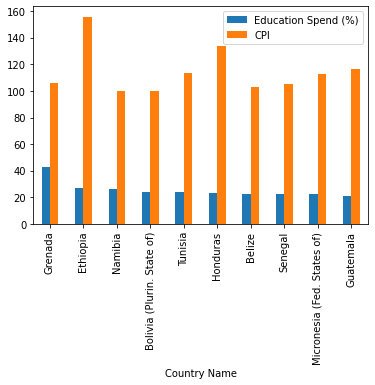

142.66661157024794

In [159]:
#Bar and Scatter Chart for Education Expense v CPI. 

#Eliminate data prior to 2010
public_education_cpi_clean = public_education_cpi.loc[(public_education_cpi["Year"]>2009)]
#Find the mean for Public Education Expense and CPI and create merged dataframe 
public_education_expense_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
cpi_mean = public_education_cpi_clean.groupby('Country Name').mean()['CPI']
education_expense_cpi_df = pd.merge(public_education_expense_mean, cpi_mean, on='Country Name')
education_expense_cpi_df = education_expense_cpi_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_cpi_df.plot.bar()
plt.show()

public_education_cpi_clean['CPI'].mean()


The correlation coefficient is: 0.004776647649013985


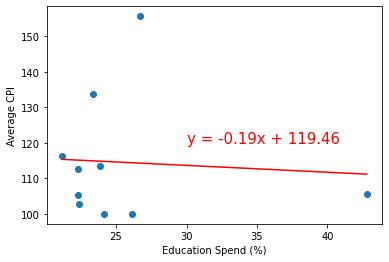

In [160]:
#Linear Regression and Correlation Coefficient - CPI
x_values = education_expense_cpi_df['Education Spend (%)']
y_values = education_expense_cpi_df["CPI"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,120), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average CPI')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 8640x288 with 0 Axes>

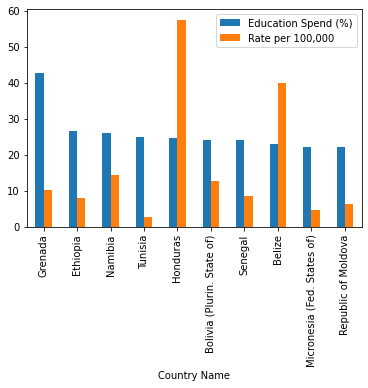

6.9409356725146205

In [161]:
#Bar and Scatter Chart for Education Expense v Homicide Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and homicide and create merged dataframe 
public_education_homicide_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Homicide (%)')].dropna()
education_expense_homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Education Spend (%)']
homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_homicide_df = pd.merge(education_expense_homicide_mean, homicide_mean, on='Country Name')
education_expense_homicide_df = education_expense_homicide_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (120,4))
education_expense_homicide_df.plot.bar()
plt.show()

public_education_homicide_clean['Rate per 100,000'].mean()

The correlation coefficient is: 0.01482607954803062


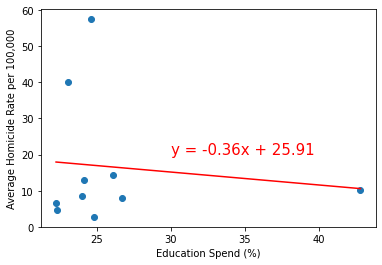

In [162]:
#Linear Regression and Correlation Coefficient - Homicide
x_values = education_expense_homicide_df['Education Spend (%)']
y_values = education_expense_homicide_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,20), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Homicide Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

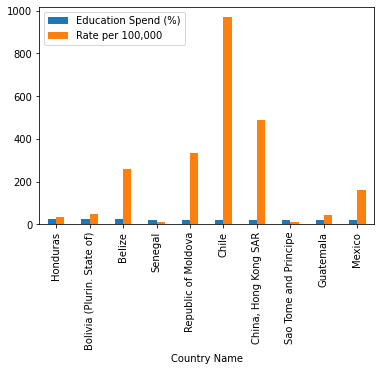

322.35256410256403

In [163]:
#Bar and Scatter Chart for Education Expense v Theft Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and theft and create merged dataframe 
public_education_theft_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Theft (%)')].dropna()
education_expense_theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Education Spend (%)']
theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_theft_df = pd.merge(education_expense_theft_mean, theft_mean, on='Country Name')
education_expense_theft_df = education_expense_theft_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_theft_df.plot.bar()
plt.show()

public_education_theft_clean['Rate per 100,000'].mean()

The correlation coefficient is: 0.019925118606278838


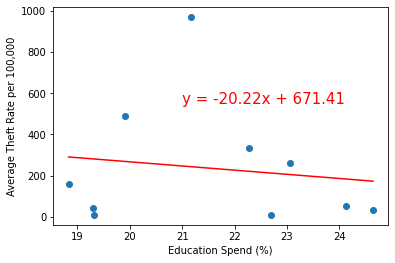

In [164]:
#Linear Regression and Correlation Coefficient - Theft
x_values = education_expense_theft_df['Education Spend (%)']
y_values = education_expense_theft_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,550), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Theft Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

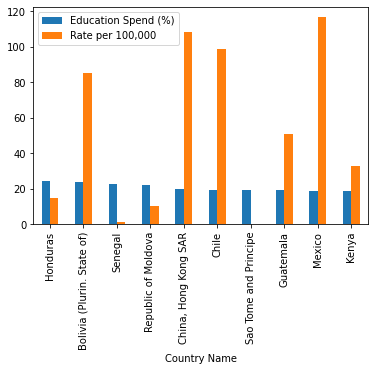

115.15619834710742

In [165]:
#Bar and Scatter Chart for Education Expense v Assault Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and assault and create merged dataframe 
public_education_assault_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Assault (%)')].dropna()
education_expense_assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Education Spend (%)']
assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_assault_df = pd.merge(education_expense_assault_mean, assault_mean, on='Country Name')
education_expense_assault_df = education_expense_assault_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_assault_df.plot.bar()
plt.show()

public_education_assault_clean["Rate per 100,000"].mean()

The correlation coefficient is: 0.10358365508512099


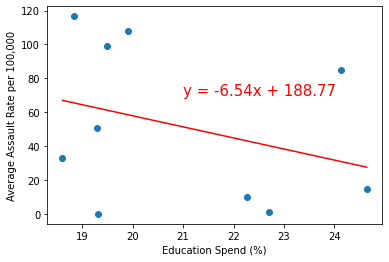

In [166]:
#Linear Regression and Correlation Coefficient - Assault
x_values = education_expense_assault_df['Education Spend (%)']
y_values = education_expense_assault_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,70), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Assault Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

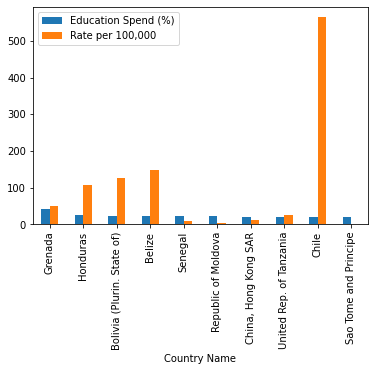

84.78650793650792

In [167]:
#Bar and Scatter Chart for Education Expense v Robbery Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and robbery and create merged dataframe 
public_education_robbery_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Robbery (%)')].dropna()
education_expense_robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Education Spend (%)']
robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_robbery_df = pd.merge(education_expense_robbery_mean, robbery_mean, on='Country Name')
education_expense_robbery_df = education_expense_robbery_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_robbery_df.plot.bar()
plt.show()

public_education_robbery_clean['Rate per 100,000'].mean()

The correlation coefficient is: 0.02246656135320604


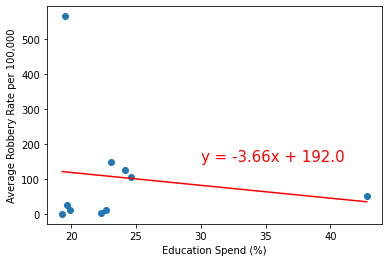

In [168]:
#Linear Regression and Correlation Coefficient - Robbery
x_values = education_expense_robbery_df['Education Spend (%)']
y_values = education_expense_robbery_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,150), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Robbery Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

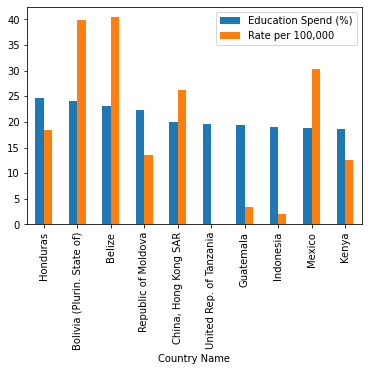

32.04761904761905

In [169]:
#Bar and Scatter Chart for Education Expense v Sexual Violence Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and sexual violence and create merged dataframe 
public_education_sex_violence_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Sexual Violence (%)')].dropna()
education_expense_sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Education Spend (%)']
sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_sex_violence_df = pd.merge(education_expense_sex_violence_mean, sex_violence_mean, on='Country Name')
education_expense_sex_violence_df = education_expense_sex_violence_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_sex_violence_df.plot.bar()
plt.show()

public_education_sex_violence_clean['Rate per 100,000'].mean()

The correlation coefficient is: 0.2813405095110784


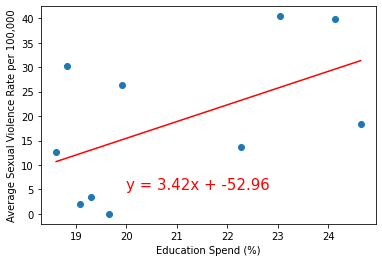

In [170]:
#Linear Regression and Correlation Coefficient - Sexual Violence 
x_values = education_expense_sex_violence_df['Education Spend (%)']
y_values = education_expense_sex_violence_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(20,5), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Sexual Violence Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

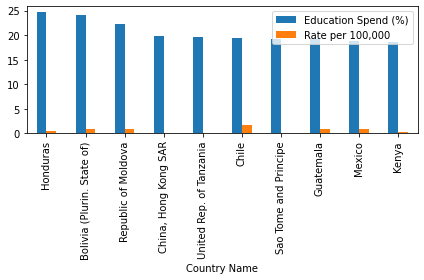

1.8307017543859645

In [171]:
#Bar and Scatter Chart for Education Expense v Kidnapping Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and kidnapping and create merged dataframe 
public_education_kidnapping_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Kidnapping (%)')].dropna()
education_expense_kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Education Spend (%)']
kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_kidnapping_df = pd.merge(education_expense_kidnapping_mean, kidnapping_mean, on='Country Name')
education_expense_kidnapping_df = education_expense_kidnapping_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_kidnapping_df.plot.bar()
plt.tight_layout()
plt.show()

public_education_kidnapping_clean['Rate per 100,000'].mean()


The correlation coefficient is: 0.01968246888446792


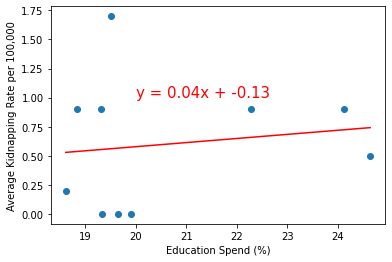

In [172]:
#Linear Regression and Correlation Coefficient - Kidnapping
x_values = education_expense_kidnapping_df['Education Spend (%)']
y_values = education_expense_kidnapping_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(20,1), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Kidnapping Rate per 100,000')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

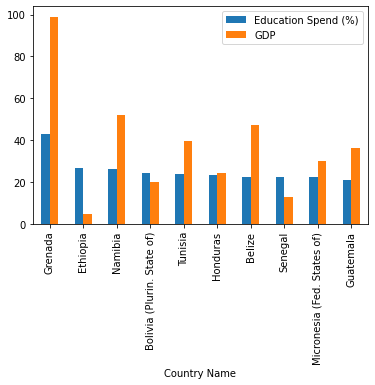

13930.686507936507

In [173]:
#Bar and Scatter Chart for Education Expense v GDP. 

#Eliminate data prior to 2010
public_education_gdp_clean = public_education_gdp.loc[(public_education_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and GDP and create merged dataframe 
public_education_expense_gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['Education Spend (%)']
gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['GDP']/100
education_expense_gdp_df = pd.merge(public_education_expense_gdp_mean, gdp_mean, on='Country Name')
education_expense_gdp_df = education_expense_gdp_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_gdp_df.plot.bar()
plt.show()

public_education_gdp_clean['GDP'].mean()

The correlation coefficient is: 0.5923907728422092


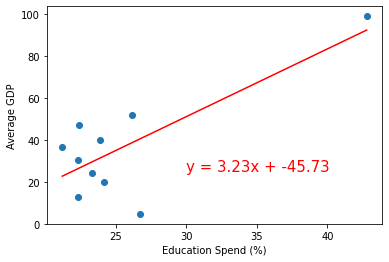

In [182]:
#Linear Regression and Correlation Coefficient - GDP
x_values = education_expense_gdp_df['Education Spend (%)']
y_values = education_expense_gdp_df["GDP"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,25), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average GDP')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

No Data for GDP Percent - Given the filtering for top countries there was no data for GDP Percent


<Figure size 5760x432 with 0 Axes>

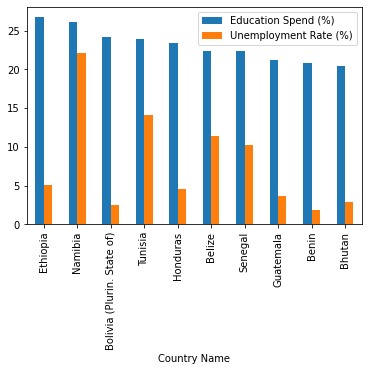

8.04011976047904

In [175]:
#Bar and Scatter Chart for Education Expense v Unemployment Rate. 

#Eliminate data prior to 2010
public_education_labor_clean = public_education_labor.loc[(public_education_labor["Year"]>2009)]
#Find the mean for Public Education Expense and the unemployment rate and create merged dataframe 
public_education_expense_labor_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
labor_mean = public_education_labor_clean.groupby('Country Name').mean()['Unemployment Rate (%)']
education_expense_labor_df = pd.merge(public_education_expense_mean, labor_mean, on='Country Name')
education_expense_labor_df = education_expense_labor_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_labor_df.plot.bar()
plt.show()

public_education_labor_clean['Unemployment Rate (%)'].mean()


The correlation coefficient is: 0.24535457621206924


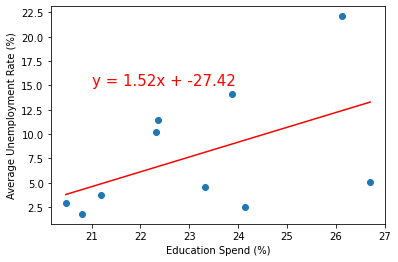

In [176]:
#Linear Regression and Correlation Coefficient - Labor 
x_values = education_expense_labor_df['Education Spend (%)']
y_values = education_expense_labor_df["Unemployment Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,15), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Unemployment Rate (%)')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

<Figure size 5760x432 with 0 Axes>

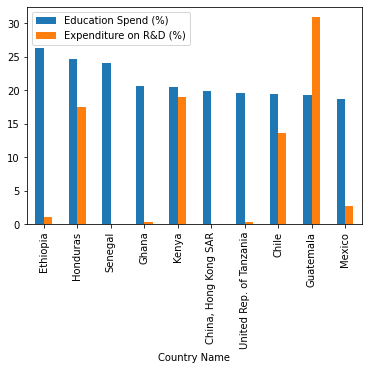

4.807228915662651

In [177]:
#Bar and Scatter Chart for Education Expense v R&D

#Eliminate data prior to 2010
public_education_rnd_clean = public_education_rnd_gdp.loc[(public_education_rnd_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and R&D and create merged dataframe 
public_education_expense_rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Education Spend (%)']
rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Expenditure on R&D (%)']
education_expense_rnd_df = pd.merge(public_education_expense_rnd_mean, rnd_mean, on='Country Name')
education_expense_rnd_df = education_expense_rnd_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_rnd_df.plot.bar()
plt.show()

public_education_rnd_clean['Expenditure on R&D (%)'].mean()


The correlation coefficient is: 0.031668237759550154


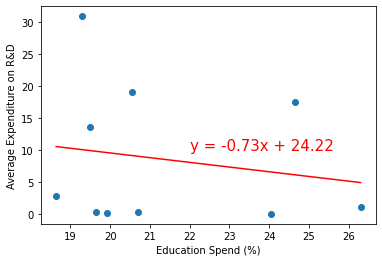

In [178]:
#Linear Regression and correlation coefficient - R&D
x_values = education_expense_rnd_df['Education Spend (%)']
y_values = education_expense_rnd_df['Expenditure on R&D (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(22,10), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Expenditure on R&D')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()